# **Project Name** - Local Food Wastage Management System

##### **Project Type**    - Data analysis / Web application
##### **Contribution**    - Individual

## **Project Summary:**
The Local Food Wastage Management System is a Python and SQL-based web application developed using Streamlit to address the issue of surplus food wastage. It connects restaurants, households, and donors with NGOs and individuals in need by providing a platform to list, request, and manage surplus food. The system not only helps reduce food wastage but also promotes social good by redistributing food resources effectively. It includes features such as user management, food listing and request tracking, and data analysis dashboards to provide insights into donation trends and wastage patterns, supporting better decision-making and impact measurement.

## **GitHub Link -**
https://github.com/gvdharun/Local-Food-Wastage-Management-System.git

# **Problem Statement:**
Food wastage is a significant issue, with many households and restaurants discarding surplus food while numerous people struggle with food insecurity. This project aims to develop a Local Food Wastage Management System, where:
- Restaurants and individuals can list surplus food.
- NGOs or individuals in need can claim the food.
- SQL stores available food details and locations.
- A Streamlit app enables interaction, filtering, CRUD operation and visualization. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import necessary libraries
# Data manipulation library
import pandas as pd

# Database library
import sqlite3 as sql

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [3]:
# Load data from CSV files
providers = pd.read_csv("data/providers_data.csv")
receivers = pd.read_csv("data/receivers_data.csv")
food_listings = pd.read_csv("data/food_listings_data.csv")
claims = pd.read_csv("data/claims_data.csv")

Dataset View

In [4]:
# Display providers data
providers

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


In [5]:
# Display receivers data
receivers

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154
...,...,...,...,...,...
995,996,Matthew Curtis,Shelter,Lanechester,127-889-4442x1289
996,997,Amanda Cain,NGO,New Steven,+1-001-491-5601x5316
997,998,Theodore Briggs,Individual,South Sandra,930-609-9442x5031
998,999,Cheyenne Ramsey,NGO,Lake Jeffery,001-326-320-4816x15300


In [6]:
# Display food listings data
food_listings

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,3/30/2025,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,3/18/2025,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,3/22/2025,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,3/30/2025,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch


In [7]:
# Display claims data
claims

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17
...,...,...,...,...,...
995,996,855,211,Completed,3/13/2025 19:40
996,997,980,746,Cancelled,3/17/2025 22:04
997,998,832,967,Cancelled,3/13/2025 18:00
998,999,917,90,Completed,3/1/2025 15:31


Dataset shape:

In [18]:
# Dataset shapes
print("Providers:", providers.shape)
print("Receivers:", receivers.shape)
print("Food Listings:", food_listings.shape)
print("Claims:", claims.shape)

Providers: (1000, 6)
Receivers: (1000, 5)
Food Listings: (1000, 9)
Claims: (1000, 5)


Dataset Information:

In [14]:
# Information about data
print("Providers Data Information: ")
providers.info()

print("\nReceivers Data Information: ")
receivers.info()

print("\nFood Listings Data Information: ") 
food_listings.info()

print("\nClaims Data Information: ")
claims.info()

Providers Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB

Receivers Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB

Food Listings

Duplicate Values: 

In [17]:
# Check for duplicate values in all data
print("Duplicate values in providers data: ", providers.duplicated().sum())
print("Duplicate values in receivers data: ", receivers.duplicated().sum()) 
print("Duplicate values in food listings data: ", food_listings.duplicated().sum())
print("Duplicate values in claims data: ", claims.duplicated().sum())

Duplicate values in providers data:  0
Duplicate values in receivers data:  0
Duplicate values in food listings data:  0
Duplicate values in claims data:  0


Missing values / Null values:

In [16]:
# Check for missing values in all data
print("Missing values in providers data:\n", providers.isnull().sum())
print("\nMissing values in receivers data:\n", receivers.isnull().sum())
print("\nMissing values in food listings data:\n", food_listings.isnull().sum())
print("\nMissing values in claims data:\n", claims.isnull().sum())

Missing values in providers data:
 Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64

Missing values in receivers data:
 Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64

Missing values in food listings data:
 Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64

Missing values in claims data:
 Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64


## 📊 Dataset Overview

The project leverages four interconnected datasets that simulate the ecosystem of a **Local Food Wastage Management System**.  
The datasets are clean (no missing or duplicate values), making them ready for analysis and modeling.

#### 1. Providers Data
- Shape: 1000 rows x 6 columns
- Contains **1,000 records**, representing food donors such as restaurants, individuals, NGOs, etc.  
- Key details include **Provider ID, Name, Type, Address, City, Contact**.  

| Column        | Description                              |
|---------------|------------------------------------------|
| Provider_ID   | Unique identifier for each provider       |
| Name          | Name of the provider (restaurant, donor) |
| Type          | Type of provider (Restaurant, Individual) |
| Address       | Full address                             |
| City          | City where provider is located           |
| Contact       | Contact information (phone/email)        |

#### 2. Receivers Data
- Shape: 1000 rows x 5 columns
- Contains **1,000 records** of food receivers (NGOs, shelters, individuals).  
- Includes **Receiver ID, Name, Type, City, Contact**.  

| Column        | Description                              |
|---------------|------------------------------------------|
| Receiver_ID   | Unique identifier for each receiver       |
| Name          | Name of the individual/organization      |
| Type          | Receiver type (NGO, Individual, Shelter) |
| City          | City where receiver is located           |
| Contact       | Contact information                      |

#### 3. Food Listings Data
- Shape: 1000 rows x 9 columns
- Contains **1,000 records** of surplus food listed by providers.  
- Captures detailed information such as type of food, meal category, and expiry dates.  

| Column         | Description                                      |
|----------------|--------------------------------------------------|
| Food_ID        | Unique ID for each food listing                  |
| Food_Name      | Name of food item                                |
| Quantity       | Quantity available                               |
| Expiry_Date    | Validity of food (important for preventing waste)|
| Provider_ID    | Linked to Providers Data                         |
| Provider_Type  | Restaurant/Individual/Other                      |
| Location       | City/Location of food                            |
| Food_Type      | Category (Vegetarian, Non-Vegetarian, Packaged)  |
| Meal_Type      | Meal type (Breakfast, Lunch, Dinner, Snacks)     |

#### 4. Claims Data
- Shape: 1000 rows x 6 columns
- Contains **1,000 records** representing the transaction when a receiver claims surplus food.  
- Tracks the **status of claims (pending, approved, fulfilled, rejected)** along with time details.  

| Column        | Description                                      |
|---------------|--------------------------------------------------|
| Claim_ID      | Unique ID for each transaction                   |
| Food_ID       | Foreign key linking to Food Listings              |
| Receiver_ID   | Foreign key linking to Receivers                  |
| Status        | Status of claim (Pending/Approved/Fulfilled)     |
| Timestamp     | Entry showing when the claim was made            |

#### ✅ Data Quality Checks

- **Duplicates**: No duplicate records found in any dataset.  
- **Missing Values**: All datasets have **0 missing/null values**.  
- **Integrity**:  
  - Providers and Receivers are linked to Food Listings and Claims correctly via IDs.  
  - Claim dataset enforces relationships between food providers and receivers.  

This ensures reliable data pipelines for **EDA and Streamlit dashboard visualization**.  

---

## **2. Database Creation**

Create Database:

In [19]:
# Create a database connection
conn = sql.connect('food_waste.db')
cursor = conn.cursor()

Create Table:

In [ ]:
# Create the providers table
cursor.execute('''
CREATE TABLE IF NOT EXISTS providers (
    Provider_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Type TEXT,
    Address TEXT,
    City TEXT,
    Contact TEXT
);''')

# Create the receivers table
cursor.execute('''
CREATE TABLE IF NOT EXISTS receivers (
    Receiver_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Type TEXT,
    City TEXT,
    Contact TEXT
);''')

# Create the food_listings table
cursor.execute('''
CREATE TABLE IF NOT EXISTS food_listings (
    Food_ID INTEGER PRIMARY KEY,
    Food_Name TEXT,
    Quantity INTEGER,
    Expiry_Date DATE,
    Provider_ID INTEGER,
    Provider_Type TEXT,
    Location TEXT,
    Food_Type TEXT,
    Meal_Type TEXT,
    FOREIGN KEY (Provider_ID) REFERENCES providers (Provider_ID)
);''')

# Create the claims table
cursor.execute('''
CREATE TABLE IF NOT EXISTS claims (
    Claim_ID INTEGER PRIMARY KEY,
    Food_ID INTEGER,
    Receiver_ID INTEGER,
    Status TEXT,
    Timestamp DATETIME,
    FOREIGN KEY (Food_ID) REFERENCES food_listings (Food_ID),
    FOREIGN KEY (Receiver_ID) REFERENCES receivers (Receiver_ID)
);''')

# Commit the changes
conn.commit()

print(" Database and tables created successfully!")

 Database and tables created successfully!


Data Insertion:

In [22]:
# Insert data into the providers table
for _, row in providers.iterrows():
    cursor.execute("INSERT INTO providers VALUES (?, ?, ?, ?, ?, ?);", tuple(row))

# Insert data into the receivers table
for _, row in receivers.iterrows():
    cursor.execute("INSERT INTO receivers VALUES (?, ?, ?, ?, ?);", tuple(row))

# Insert data into the food_listings table
for _, row in food_listings.iterrows():
    cursor.execute("INSERT INTO food_listings VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);", tuple(row))

# Insert data into the claims table
for _, row in claims.iterrows():
    cursor.execute("INSERT INTO claims VALUES (?, ?, ?, ?, ?);", tuple(row))

conn.commit()

Display Table:

In [29]:
# Displaying tables
# Providers
p = cursor.execute("SELECT * FROM providers;").fetchall()
p_df = pd.DataFrame(p, columns=['Provider_ID', 'Name', 'Type', 'Address', 'City', 'Contact'])
p_df

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


In [30]:
# Receivers
r = cursor.execute("SELECT * FROM receivers;").fetchall()
r_df = pd.DataFrame(r, columns=['Receiver_ID', 'Name', 'Type', 'City', 'Contact'])
r_df

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154
...,...,...,...,...,...
995,996,Matthew Curtis,Shelter,Lanechester,127-889-4442x1289
996,997,Amanda Cain,NGO,New Steven,+1-001-491-5601x5316
997,998,Theodore Briggs,Individual,South Sandra,930-609-9442x5031
998,999,Cheyenne Ramsey,NGO,Lake Jeffery,001-326-320-4816x15300


In [31]:
# Food listings
fl = cursor.execute("SELECT * FROM food_listings;").fetchall()
fl_df = pd.DataFrame(fl, columns=['Food_ID', 'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID', 'Provider_Type', 'Location', 'Food_Type', 'Meal_Type'])
fl_df

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,3/30/2025,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,3/18/2025,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,3/22/2025,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,3/30/2025,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch


In [32]:
# Claims
c = cursor.execute("SELECT * FROM claims;").fetchall()
c_df = pd.DataFrame(c, columns=['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'])
c_df

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17
...,...,...,...,...,...
995,996,855,211,Completed,3/13/2025 19:40
996,997,980,746,Cancelled,3/17/2025 22:04
997,998,832,967,Cancelled,3/13/2025 18:00
998,999,917,90,Completed,3/1/2025 15:31


## 🍲 Database Overview

We have successfully created a relational database `food_waste.db` with **4 tables**:  

#### 1️⃣ Providers Table
- **Schema:**  
  - Provider_ID - (Integer) (Primary Key)  
  - Name  - (String) 
  - Type  - (String) 
  - Address  - (String) 
  - City  - (String) 
  - Contact  - (String) 



#### 2️⃣ Receivers Table
- **Schema:**  
  - Receiver_ID - (Integer) (Primary Key)  
  - Name  - (String)
  - Type  - (String)
  - City  - (String)
  - Contact  - (String)



#### 3️⃣ Food Listings Table
- **Schema:**  
  - Food_ID - (Integer) (Primary Key)  
  - Food_Name  - (String)
  - Quantity  - (Integer)
  - Expiry_Date  - (Date)
  - Provider_ID - (Integer) (Foreign Key → Providers)  
  - Provider_Type  - (String)
  - Location  - (String)
  - Food_Type  - (String)
  - Meal_Type  - (String)


#### 4️⃣ Claims Table
- **Schema:**  
  - Claim_ID  - (Integer) (Primary Key)  
  - Food_ID - (Integer) (Foreign Key → Food_Listings)  
  - Receiver_ID - (Integer) (Foreign Key → Receivers)  
  - Status - (String) (`Pending`, `Completed`, `Canceled`)  
  - Timestamp  - (DateTime)


#### ✅ Summary
- Database file: `food_waste.db`  
- Tables created: `providers`, `receivers`, `food_listings`, `claims`  
- All data from Pandas DataFrames successfully inserted  
- Next step: Run **EDA & SQL analysis** queries to generate insights  
---

## **3. Data Analysis**

### Food Providers & Receivers

1.	How many food providers and receivers are there in each city?

In [40]:
# Food providers and receivers in each city
city_data = cursor.execute('''
SELECT City, 'Provider' AS Type, COUNT(*) AS Count
FROM Providers
GROUP BY City
UNION ALL
SELECT City, 'Receiver' AS Type, COUNT(*) AS Count
FROM Receivers
GROUP BY City
ORDER BY City, Type;
''').fetchall()

city_df = pd.DataFrame(city_data, columns=['City', 'Type', 'Count'])
city_df

,City,Type,Count
0,Aaronshire,Receiver,1
1,Adambury,Provider,1
2,Adamland,Receiver,1
3,Adamsview,Provider,1
4,Adamsville,Provider,1
...,...,...,...
1924,Yatesside,Provider,1
1925,Youngchester,Provider,1
1926,Zacharyview,Receiver,1
1927,Zimmermanton,Provider,1


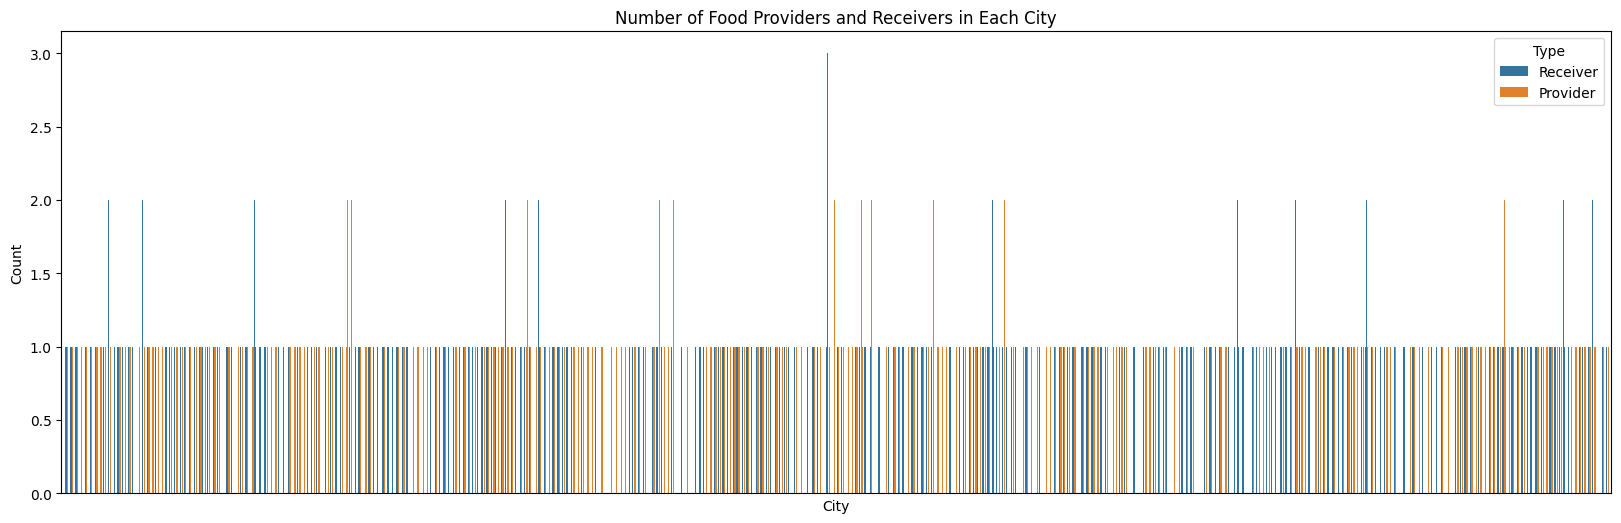

In [56]:
# Visualize the number of food providers and receivers in each city
plt.figure(figsize=(20, 6))
sns.barplot(x='City', y='Count', hue='Type', data=city_df)
plt.title('Number of Food Providers and Receivers in Each City')
plt.xticks([])
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

2.	Which type of food provider (restaurant, grocery store, etc.) contributes the most food?

In [61]:
# Top food provider type based on the quantity of food listed
top_provider = cursor.execute('''
SELECT p.Type AS Provider_Type, SUM(f.Quantity) AS Total_Quantity
FROM Food_Listings f
JOIN Providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Type
ORDER BY Total_Quantity DESC
LIMIT 1;
''').fetchall()

top_provider_df = pd.DataFrame(top_provider, columns=['Provider_Type', 'Total_Quantity'])
top_provider_df

,Provider_Type,Total_Quantity
0,Restaurant,6923


3.	What is the contact information of food providers in a specific city?

In [ ]:
# Contact information of food providers in New Jessica
contact_providers = cursor.execute('''
SELECT Name, Type, Address, Contact
FROM Providers
WHERE City = 'New Jessica';
''').fetchall()

contact_providers_df = pd.DataFrame(contact_providers, columns=['Name', 'Type', 'Address', 'Contact'])
contact_providers_df

,Name,Type,Address,Contact
0,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",+1-600-220-0480


4.	Which receivers have claimed the most food?

In [ ]:
# Top 20 receivers based on the number of claims
claim_receiver = cursor.execute('''
SELECT r.Name AS Receiver_Name, COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Receiver_ID, r.Name
ORDER BY Total_Claims DESC
LIMIT 20;
''').fetchall()

claim_receiver_df = pd.DataFrame(claim_receiver, columns=['Receiver_Name', 'Total_Claims'])
claim_receiver_df

,Receiver_Name,Total_Claims
0,Scott Hunter,5
1,William Frederick,5
2,Matthew Webb,5
3,Anthony Garcia,5
4,Alvin West,4
5,Jennifer Nelson,4
6,Kristina Simpson,4
7,Kristine Martin,4
8,Betty Reid,4
9,Chelsea Powell,4


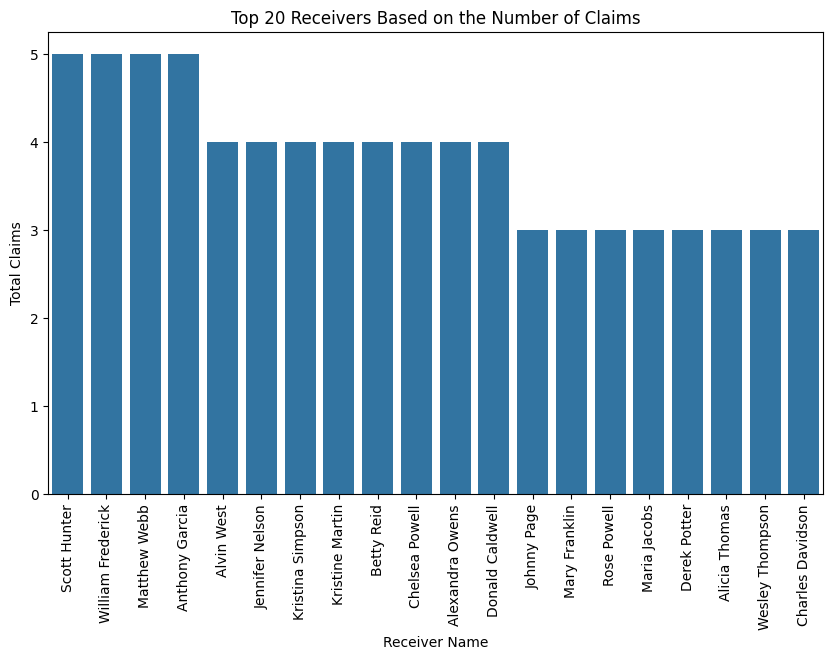

In [72]:
# Visualize the top receivers based on the number of claims
plt.figure(figsize=(10, 6))
sns.barplot(x='Receiver_Name', y='Total_Claims', data=claim_receiver_df)
plt.title('Top 20 Receivers Based on the Number of Claims')
plt.xticks(rotation=90)
plt.xlabel('Receiver Name')
plt.ylabel('Total Claims')
plt.show()

## 📊 SQL Queries & Analysis – Food Providers & Receivers

This section provides insights into **food providers, receivers, food listings, and claims data** using SQL queries on the SQLite database.

#### ✅ 1. How many food providers and receivers are there in each city?

**Result (sample preview):**

| City          | Type      | Count |
|---------------|-----------|-------|
| Aaronshire    | Receiver  | 1     |
| Adambury      | Provider  | 1     |
| Adamland      | Receiver  | 1     |
| Adamsview     | Provider  | 1     |
| Adamsville    | Provider  | 1     |
| ...           | ...       | ...   |
| Yatesside     | Provider  | 1     |
| Youngchester  | Provider  | 1     |
| Zacharyview   | Receiver  | 1     |
| Zimmermanton  | Provider  | 1     |
| Zimmermanville| Provider  | 1     |

📌 **Observation:** Almost every city has **either providers or receivers**, indicating widespread participation across various locations.

---

#### ✅ 2. Which type of food provider contributes the most food (by quantity)?

**Result:**

| Provider_Type | Total_Quantity |
|---------------|----------------|
| Restaurant    | 6923           |

📌 **Observation:** **Restaurants** are the top contributors of surplus food, offering the majority of available food items.

---

#### ✅ 3. What is the contact information of food providers in a specific city?

**Result (New Jessica):**

| Name             | Type        | Address                                                   | Contact        |
|------------------|-------------|-----------------------------------------------------------|----------------|
| Gonzales-Cochran | Supermarket | 74347 Christopher Extensions, Andreamouth, OK            | +1-600-220-0480 |

📌 **Usage:** This information helps NGOs or individuals directly contact providers in their city to arrange food collection.

---

#### ✅ 4. Which receivers have claimed the most food?

**Result (Top 10 sample):**

| Receiver_Name     | Total_Claims |
|-------------------|--------------|
| Scott Hunter      | 5            |
| William Frederick | 5            |
| Matthew Webb      | 5            |
| Anthony Garcia    | 5            |
| Alvin West        | 4            |
| Jennifer Nelson   | 4            |
| Kristina Simpson  | 4            |
| Kristine Martin   | 4            |
| Betty Reid        | 4            |
| Chelsea Powell    | 4            |

📌 **Observation:** Certain NGOs/individuals (e.g., *Scott Hunter, William Frederick, Matthew Webb*) are **highly active receivers**, consistently claiming surplus food.

---

#### 🔎 Summary of Insights
1. **Providers and Receivers** are evenly spread across different cities.  
2. **Restaurants** are the most significant contributors to the food system.  
3. Provider contact details allow establishing a **direct food recovery network**.  
4. A few **active receivers** dominate the claims, suggesting opportunities to expand outreach to less active NGOs.  

---

### Food Listings & Availability

5.	What is the total quantity of food available from all providers?

In [ ]:
# Total food quantity available
total_food_quantity = cursor.execute('''
SELECT SUM(Quantity) AS Total_Food_Quantity
FROM Food_Listings;
''').fetchall()

total_food_quantity_df = pd.DataFrame(total_food_quantity, columns=['Total_Food_Quantity'])
total_food_quantity_df

,Total_Food_Quantity
0,25794


6.	Which city has the highest number of food listings?

In [ ]:
# Top 10 cities with the highest number of food listings
highest_food_listings = cursor.execute('''
SELECT Location AS City, COUNT(Food_ID) AS Total_Listings
FROM Food_Listings
GROUP BY Location
ORDER BY Total_Listings DESC
LIMIT 10;
''').fetchall()

highest_food_listings_df = pd.DataFrame(highest_food_listings, columns=['City', 'Total_Listings'])
highest_food_listings_df

,City,Total_Listings
0,South Kathryn,6
1,New Carol,6
2,Perezport,5
3,Jimmyberg,5
4,East Angela,5
5,West Whitneymouth,4
6,West Kevin,4
7,South Thomasville,4
8,South Christopherborough,4
9,Port Patrick,4


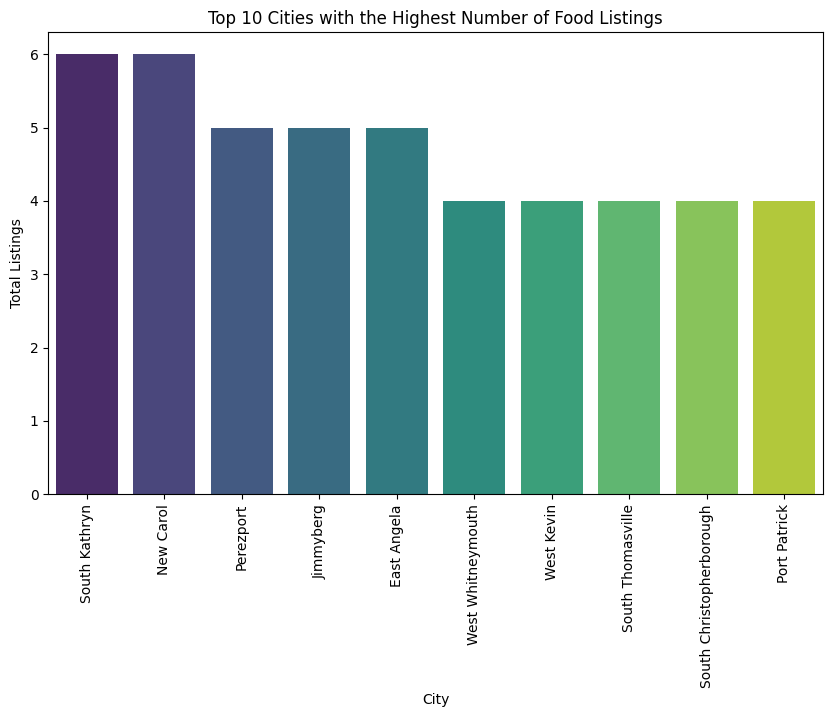

In [127]:
# Visualize the top 10 cities with the highest number of food listings
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total_Listings', data=highest_food_listings_df, hue='City', palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Food Listings')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Total Listings')
plt.show()

7.	What are the most commonly available food types?

In [ ]:
# Count of available food types
count_food_type = cursor.execute('''
SELECT Food_Type, COUNT(Food_ID) AS Count_Available
FROM Food_Listings
GROUP BY Food_Type
ORDER BY Count_Available DESC;
''').fetchall()

count_food_type_df = pd.DataFrame(count_food_type, columns=['Food_Type', 'Count_Available'])
count_food_type_df

,Food_Type,Count_Available
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330


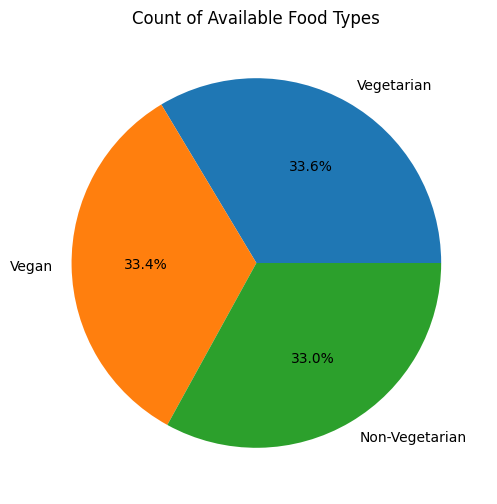

In [91]:
# Visualize the count of available food types
plt.figure(figsize=(10, 6))
plt.pie(count_food_type_df['Count_Available'], labels=count_food_type_df['Food_Type'], autopct='%1.1f%%')
plt.title('Count of Available Food Types')
plt.show()

## 📊 SQL Queries & Analysis – Food Listings & Availability

#### 5. What is the total quantity of food available from all providers?

**Result:**
| Total_Food_Quantity |
|---------------------|
| 25,794              |

📌 **Insight:** Across all providers combined, there are **25,794 units/servings of food** available for distribution.

---

#### 6. Which city has the highest number of food listings?

**Result (Top 10 cities):**
| City                   | Total_Listings |
|-------------------------|----------------|
| South Kathryn           | 6              |
| New Carol              | 6              |
| Perezport              | 5              |
| Jimmyberg              | 5              |
| East Angela            | 5              |
| West Whitneymouth      | 4              |
| West Kevin             | 4              |
| South Thomasville      | 4              |
| South Christopherborough| 4             |
| Port Patrick           | 4              |

📌 **Insight:**  
- **South Kathryn** and **New Carol** lead with the maximum (6 each) food listings.  
- Multiple cities actively provide surplus food, showing good geographic spread.

---

#### 7. What are the most commonly available food types?

**Result:**
| Food_Type       | Count_Available |
|-----------------|-----------------|
| Vegetarian      | 336             |
| Vegan           | 334             |
| Non-Vegetarian  | 330             |

📌 **Insight:**  
- **Vegetarian food** is the most available (336 listings).  
- **Vegan food** follows closely (334) → showing increasing availability.  
- **Non-Vegetarian** makes up a nearly equal share (330).  
- Together, all categories are **almost evenly distributed** (balanced supply).

---

#### 📝 Summary
- ✅ **25.8K+ units of food** are currently available.  
- ✅ **South Kathryn & New Carol** are the top food listing cities.  
- ✅ Supply is **balanced across food types** (Vegetarian, Vegan, Non-Vegetarian), ensuring diversity for receivers.  

---

### Claims & Distribution

8. How many food claims have been made for each food item?

In [ ]:
# Top 10 most claimed food items
food_claimed = cursor.execute('''
SELECT f.Food_Name, COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Food_Name
ORDER BY Total_Claims DESC;
''').fetchall()

food_claimed_df = pd.DataFrame(food_claimed, columns=['Food_Name', 'Total_Claims'])
food_claimed_df

,Food_Name,Total_Claims
0,Rice,122
1,Soup,114
2,Dairy,110
3,Fish,108
4,Salad,106
5,Chicken,102
6,Bread,94
7,Pasta,87
8,Vegetables,86
9,Fruits,71


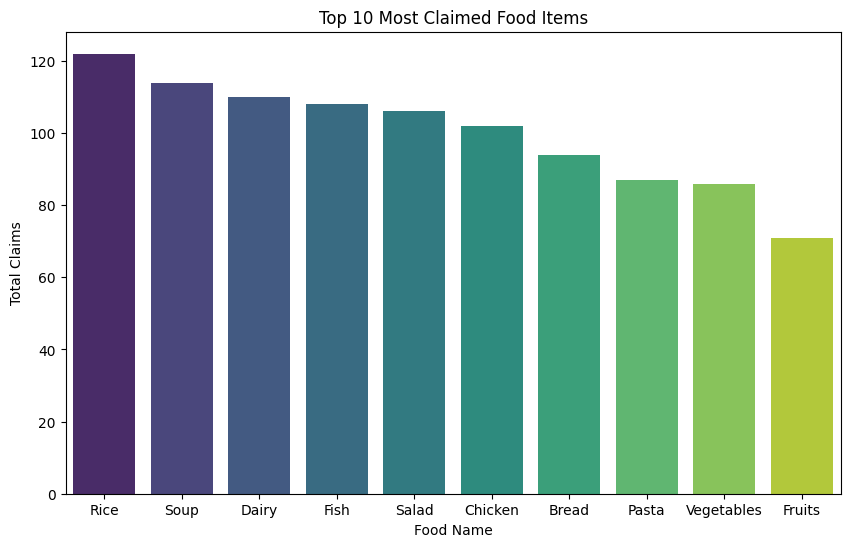

In [100]:
# Visualize the top 10 most claimed food items
plt.figure(figsize=(10, 6))
sns.barplot(x='Food_Name', y='Total_Claims', data=food_claimed_df, hue='Food_Name', palette='viridis')
plt.title('Top 10 Most Claimed Food Items')
plt.xlabel('Food Name')
plt.ylabel('Total Claims')
plt.show()

9. Which provider has had the highest number of successful food claims?

In [ ]:
# Top 10 providers with the highest number of successful claims
highest_successful_claims = cursor.execute('''
SELECT p.Name AS Provider_Name, COUNT(c.Claim_ID) AS Successful_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
JOIN Providers p ON f.Provider_ID = p.Provider_ID
WHERE c.Status = 'Completed'
GROUP BY p.Provider_ID, p.Name
ORDER BY Successful_Claims DESC
LIMIT 10;
''').fetchall()

highest_successful_claims_df = pd.DataFrame(highest_successful_claims, columns=['Provider_Name', 'Successful_Claims'])
highest_successful_claims_df

,Provider_Name,Successful_Claims
0,Barry Group,5
1,"Harper, Blake and Alexander",4
2,"Barnes, Castro and Curtis",4
3,Butler-Richardson,4
4,Miller Inc,4
5,Campbell LLC,3
6,Bradford-Martinez,3
7,Nelson LLC,3
8,Rogers-Warren,3
9,Beck Inc,3


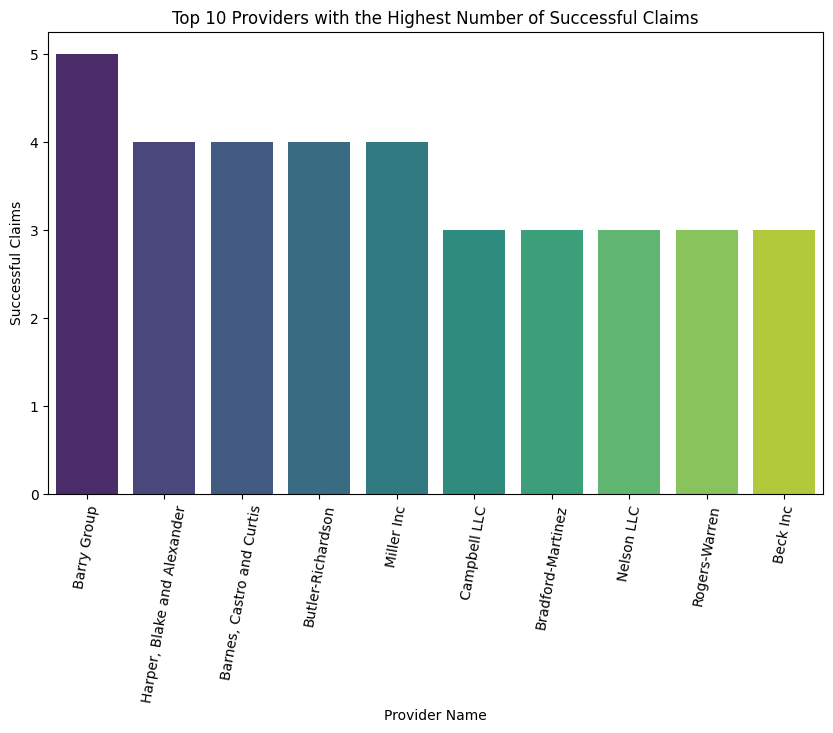

In [105]:
# Visualize the top 10 providers with the highest number of successful claims
plt.figure(figsize=(10, 6))
sns.barplot(x='Provider_Name', y='Successful_Claims', data=highest_successful_claims_df, hue='Provider_Name', palette='viridis')
plt.title('Top 10 Providers with the Highest Number of Successful Claims')
plt.xticks(rotation=80)
plt.xlabel('Provider Name')
plt.ylabel('Successful Claims')
plt.show()

10. What percentage of food claims are completed vs. pending vs. canceled?

In [ ]:
# Percentage of claim status
percentage_claim_status = cursor.execute('''
SELECT 
    Status,
    COUNT(*) AS Claim_Count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Claims), 2) AS Percentage
FROM Claims
GROUP BY Status;
''').fetchall()

percentage_claim_status_df = pd.DataFrame(percentage_claim_status, columns=['Status', 'Claim_Count', 'Percentage'])
percentage_claim_status_df

,Status,Claim_Count,Percentage
0,Cancelled,336,33.6
1,Completed,339,33.9
2,Pending,325,32.5


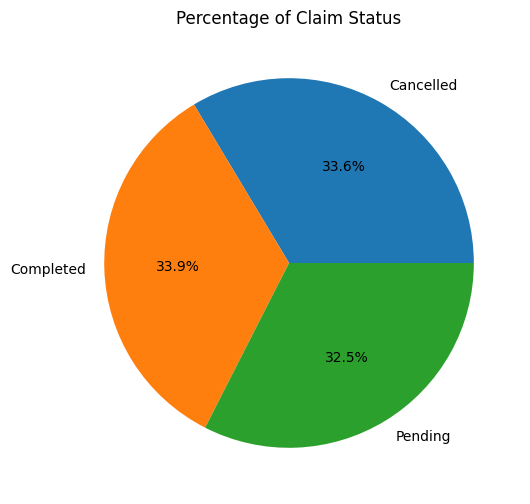

In [109]:
# Visualize the percentage of claim status
plt.figure(figsize=(10, 6))
plt.pie(percentage_claim_status_df['Percentage'], labels=percentage_claim_status_df['Status'], autopct='%1.1f%%')
plt.title('Percentage of Claim Status')
plt.show()

## 📊 SQL Queries & Analysis – Claims & Distribution

This section analyzes the **claims data** to understand food demand distribution, provider contribution, and claim statuses.

#### ✅ 8. How many food claims have been made for each food item?

**Result (Top 10):**

| Food_Name   | Total_Claims |
|-------------|--------------|
| Rice        | 122          |
| Soup        | 114          |
| Dairy       | 110          |
| Fish        | 108          |
| Salad       | 106          |
| Chicken     | 102          |
| Bread       | 94           |
| Pasta       | 87           |
| Vegetables  | 86           |
| Fruits      | 71           |

📌 **Insight:** Staple foods like **Rice, Soup, and Dairy** are the most frequently claimed, indicating their consistent demand.

---

#### ✅ 9. Which provider has had the highest number of successful food claims?

**Result (Top 10):**

| Provider_Name              | Successful_Claims |
|----------------------------|--------------------|
| Barry Group                | 5                  |
| Harper, Blake and Alexander| 4                  |
| Barnes, Castro and Curtis  | 4                  |
| Butler-Richardson          | 4                  |
| Miller Inc                 | 4                  |
| Campbell LLC               | 3                  |
| Bradford-Martinez          | 3                  |
| Nelson LLC                 | 3                  |
| Rogers-Warren              | 3                  |
| Beck Inc                   | 3                  |

📌 **Insight:** **Barry Group** leads with the most **completed claims**, making them a highly reliable provider. Several others (Harper, Barnes, Butler, Miller) also maintain consistent contributions.

---

#### ✅ 10. What percentage of food claims are Completed vs. Pending vs. Canceled?

**Result:**

| Status    | Claim_Count | Percentage |
|-----------|-------------|------------|
| Cancelled | 336         | 33.6 %     |
| Completed | 339         | 33.9 %     |
| Pending   | 325         | 32.5 %     |

📌 **Insight:**  
- ✅ About **34% of claims are successfully completed**.  
- ⏳ **32.5% are still pending**, suggesting a need for faster logistics or approval workflows.  
- ❌ Roughly **one-third (33.6%) are canceled**, which indicates potential supply-demand or operational issues.  

---

#### 🔎 Overall Insights
- **Rice**, **Soup**, and **Dairy** dominate food demand among receivers.  
- **Barry Group** is the top-performing provider in terms of successful contributions.  
- Claim statuses are almost evenly split across **Completed, Pending, and Canceled**, which highlights room for **efficiency improvement** in operations and food distribution.  

---

### Analysis & Insights

11. What is the average quantity of food claimed per receiver?

In [ ]:
# Average quantity claimed by each receiver
avg_quantity_claimed = cursor.execute('''
SELECT r.Name AS Receiver_Name,
       ROUND(AVG(f.Quantity), 2) AS Avg_Quantity_Claimed
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
JOIN Receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Receiver_ID, r.Name
ORDER BY Avg_Quantity_Claimed DESC;
''').fetchall()

avg_quantity_claimed_df = pd.DataFrame(avg_quantity_claimed, columns=['Receiver_Name', 'Avg_Quantity_Claimed'])
avg_quantity_claimed_df

,Receiver_Name,Avg_Quantity_Claimed
0,Nancy Silva,50.0
1,Lisa Pitts,50.0
2,Daniel Williams,50.0
3,Peggy Knight,50.0
4,Christopher Wright,50.0
...,...,...
619,Corey Rodriguez,2.0
620,Kenneth Barnes,2.0
621,John Reynolds,2.0
622,Joshua Hooper,1.0


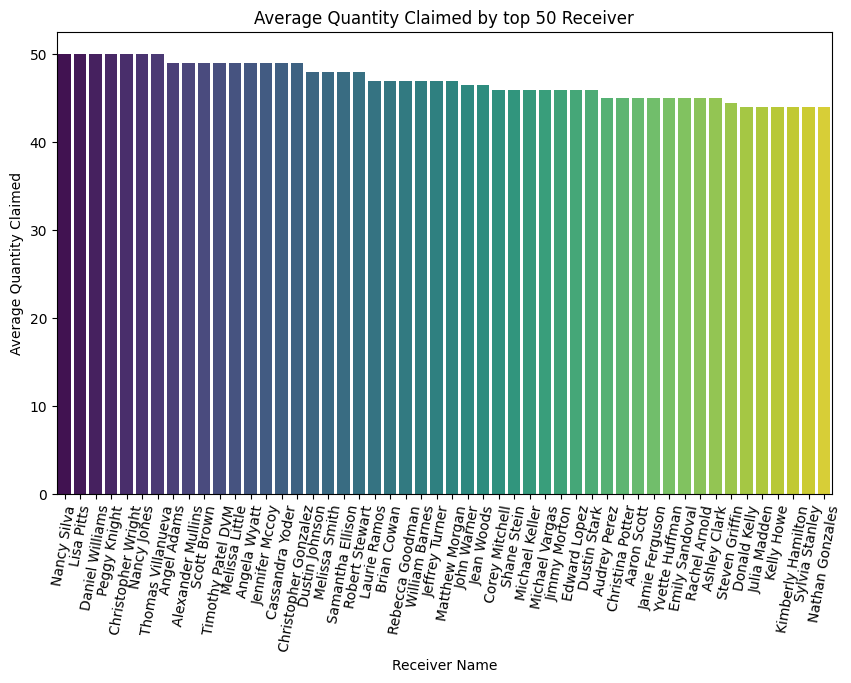

In [114]:
# Visualize the average quantity claimed by each receiver
plt.figure(figsize=(10, 6))
sns.barplot(x='Receiver_Name', y='Avg_Quantity_Claimed', data=avg_quantity_claimed_df.head(50), hue='Receiver_Name', palette='viridis')
plt.title('Average Quantity Claimed by top 50 Receiver')
plt.xticks(rotation=80)
plt.xlabel('Receiver Name')
plt.ylabel('Average Quantity Claimed')
plt.show()

12. Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

In [ ]:
# Meal type claimed
meal_type_claimed = cursor.execute('''
SELECT f.Meal_Type,
       COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Meal_Type
ORDER BY Total_Claims DESC;
''').fetchall()

meal_type_claimed_df = pd.DataFrame(meal_type_claimed, columns=['Meal_Type', 'Total_Claims'])
meal_type_claimed_df

,Meal_Type,Total_Claims
0,Breakfast,278
1,Lunch,250
2,Snacks,240
3,Dinner,232


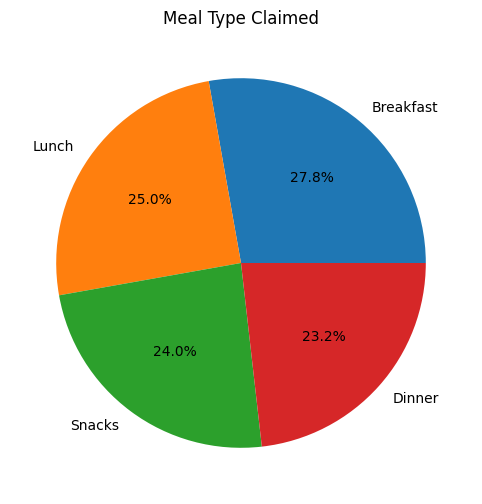

In [119]:
# Visualize the meal type claimed
plt.figure(figsize=(10, 6))
plt.pie(meal_type_claimed_df['Total_Claims'], labels=meal_type_claimed_df['Meal_Type'], autopct='%1.1f%%')
plt.title('Meal Type Claimed')
plt.show()

13.	What is the total quantity of food donated by each provider?

In [ ]:
# Top 10 providers with the highest number of food donated
food_donated = cursor.execute('''
SELECT p.Name AS Provider_Name,
       SUM(f.Quantity) AS Total_Donated
FROM Food_Listings f
JOIN Providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Provider_ID, p.Name
ORDER BY Total_Donated DESC;
''').fetchall()

food_donated_df = pd.DataFrame(food_donated, columns=['Provider_Name', 'Total_Donated'])
food_donated_df

,Provider_Name,Total_Donated
0,Barry Group,179
1,"Evans, Wright and Mitchell",158
2,Smith Group,150
3,Nelson LLC,142
4,Ruiz-Oneal,140
...,...,...
632,Gonzales-Moore,1
633,"Martinez, Armstrong and Carroll",1
634,Brown and Sons,1
635,Mcgee PLC,1


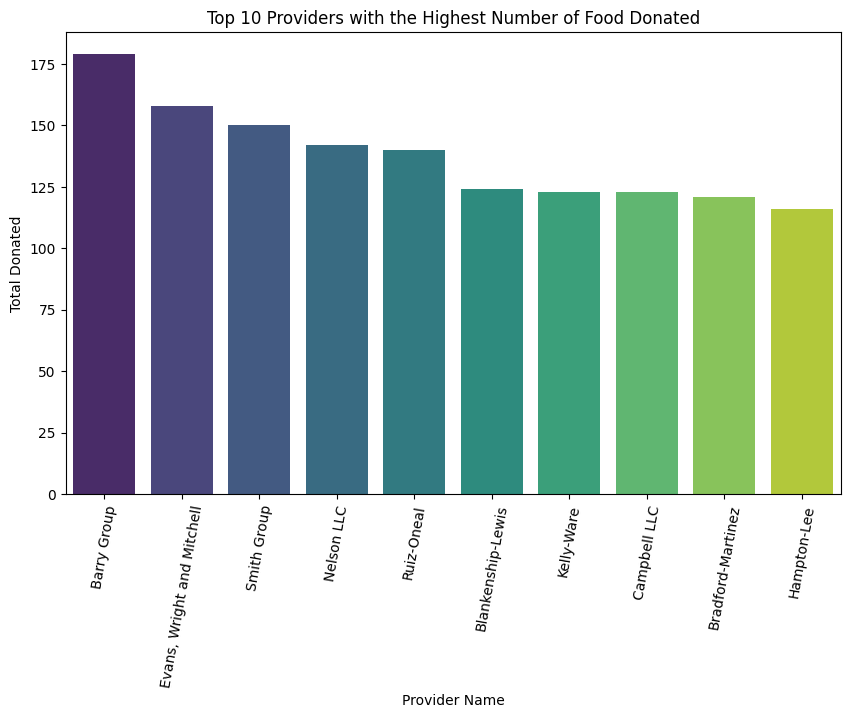

In [121]:
# Visualize the top 10 providers with the highest number of food donated
plt.figure(figsize=(10, 6))
sns.barplot(x='Provider_Name', y='Total_Donated', data=food_donated_df.head(10), hue='Provider_Name', palette='viridis')
plt.title('Top 10 Providers with the Highest Number of Food Donated')
plt.xticks(rotation=80)
plt.xlabel('Provider Name')
plt.ylabel('Total Donated')
plt.show()

14. Which receiver type (NGO, Shelter, Family) benefits the most from claims?

In [ ]:
# Receiver type by number of claims
receiver_type = cursor.execute('''
SELECT r.Type AS Receiver_Type,
       COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Receivers r ON c.Receiver_ID = r.Receiver_ID
WHERE c.Status = 'Completed'
GROUP BY r.Type
ORDER BY Total_Claims DESC;
''').fetchall()

receiver_type_df = pd.DataFrame(receiver_type, columns=['Receiver_Type', 'Total_Claims'])
receiver_type_df

,Receiver_Type,Total_Claims
0,Charity,96
1,NGO,92
2,Shelter,79
3,Individual,72


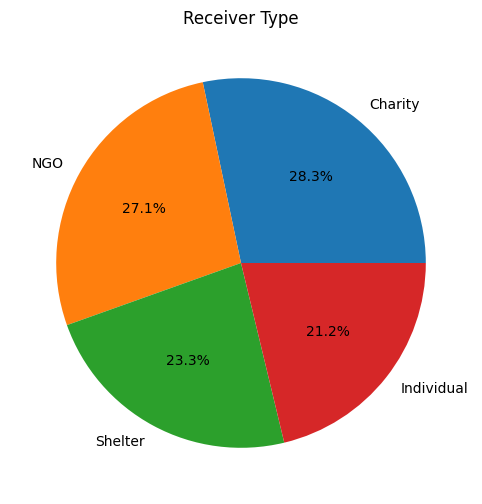

In [123]:
# Visualize the receiver type
plt.figure(figsize=(10, 6))
plt.pie(receiver_type_df['Total_Claims'], labels=receiver_type_df['Receiver_Type'], autopct='%1.1f%%')
plt.title('Receiver Type')
plt.show()

15. Which food type contributes most to food wastage (unclaimed items)?

In [ ]:
# Food type unclaimed
food_type_unclaimed = cursor.execute('''
SELECT f.Food_Type,
       COUNT(f.Food_ID) AS Unclaimed_Listings
FROM Food_Listings f
LEFT JOIN Claims c ON f.Food_ID = c.Food_ID
WHERE c.Claim_ID IS NULL
GROUP BY f.Food_Type
ORDER BY Unclaimed_Listings DESC;
''').fetchall()

food_type_unclaimed_df = pd.DataFrame(food_type_unclaimed, columns=['Food_Type', 'Unclaimed_Listings'])
food_type_unclaimed_df

,Food_Type,Unclaimed_Listings
0,Vegan,124
1,Non-Vegetarian,115
2,Vegetarian,114


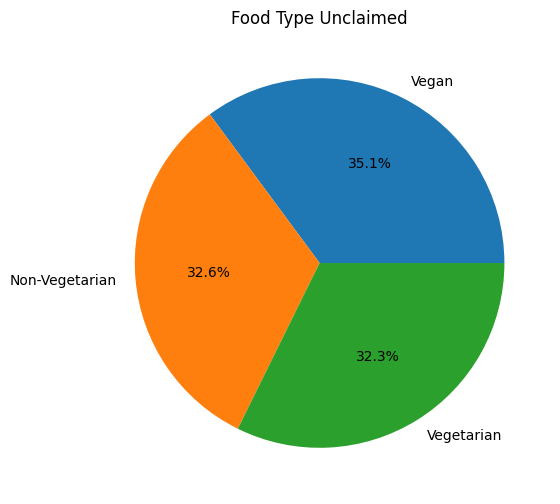

In [126]:
# Visualize the food type unclaimed
plt.figure(figsize=(10, 6))
plt.pie(food_type_unclaimed_df['Unclaimed_Listings'], labels=food_type_unclaimed_df['Food_Type'], autopct='%1.1f%%')
plt.title('Food Type Unclaimed')
plt.show()

## 🍲 SQL Queries & Analysis - Insights

This section focuses on **Receiver behavior, Food Meal Demand, Provider Contributions, and Wastage Analysis** using SQL queries.

#### ✅ 11. What is the average quantity of food claimed per receiver?

**Result (sample preview):**
| Receiver_Name       | Avg_Quantity_Claimed |
|---------------------|-----------------------|
| Nancy Silva         | 50.0                 |
| Lisa Pitts          | 50.0                 |
| Daniel Williams     | 50.0                 |
| Peggy Knight        | 50.0                 |
| Christopher Wright  | 50.0                 |
| ...                 | ...                  |
| Corey Rodriguez     | 2.0                  |
| Kenneth Barnes      | 2.0                  |
| John Reynolds       | 2.0                  |
| Joshua Hooper       | 1.0                  |
| Amanda Kline        | 1.0                  |

📌 **Insight:** Some receivers (like *Nancy Silva* and *Lisa Pitts*) consistently secure large quantities per claim, while others only claim smaller amounts.

---

#### ✅ 12. Which meal type (Breakfast, Lunch, Dinner, Snacks) is claimed the most?

**Result:**

| Meal_Type | Total_Claims |
|-----------|--------------|
| Breakfast | 278          |
| Lunch     | 250          |
| Snacks    | 240          |
| Dinner    | 232          |

📌 **Insight:** **Breakfast** is the most frequently claimed meal. This suggests that NGOs and individuals prioritize food availability during mornings.

---

#### ✅ 13. What is the total quantity of food donated by each provider?

**Result (Top 5 sample):**

| Provider_Name              | Total_Donated |
|----------------------------|---------------|
| Barry Group                | 179           |
| Evans, Wright and Mitchell | 158           |
| Smith Group                | 150           |
| Nelson LLC                 | 142           |
| Ruiz-Oneal                 | 140           |
| ...                        | ...           |

📌 **Insight:** A handful of **top contributors** (like *Barry Group* and *Smith Group*) donate significantly more food, while others contribute on a much smaller scale.

---

#### ✅ 14. Which receiver type (NGO, Shelter, Family, Charity) benefits the most from claims?

**Result:**

| Receiver_Type | Total_Claims |
|---------------|--------------|
| Charity       | 96           |
| NGO           | 92           |
| Shelter       | 79           |
| Individual    | 72           |

📌 **Insight:** **Charities and NGOs** benefit the most, indicating strong institutional participation in reducing food wastage.

---

#### ✅ 15. Which food type contributes most to wastage (unclaimed items)?

**Result:**

| Food_Type       | Unclaimed_Listings |
|-----------------|---------------------|
| Vegan           | 124                 |
| Non-Vegetarian  | 115                 |
| Vegetarian      | 114                 |

📌 **Insight:** **Vegan food** surprisingly has the highest wastage rate, followed by Non-Vegetarian items. This may reflect **less demand or mismatch in supply-demand alignment**.

---

#### 🔎 Summary of Insights
1. Some **receivers consistently claim larger quantities**, while others utilize the system for smaller needs.  
2. **Breakfast** is the most demanded meal, suggesting NGOs and shelters prioritize distributing morning meals.  
3. A few **providers are major food donors**, driving a large portion of donations.  
4. **Charities and NGOs** are the primary beneficiaries of claims.  
5. Vegan and Non-Vegetarian foods are at **higher risk of waste**, indicating a need for better distribution planning.  

---

## **4. Application Development**

## 🍲 Local Food Wastage Management System – Streamlit Application

This application is built using **Streamlit + SQLite + Pandas** to enable:
- **Food Donations Management** (providers listing surplus food)   
- **CRUD Operations** (Add, Update, Delete records)  
- **SQL-Based Insights** (15 Key analytical queries)  
- **Visual Analytics Dashboard** (charts for food distribution & wastage trends)

---

## 🔹 Tech Stack
- **Frontend/UI**: Streamlit  
- **Database**: SQLite (`food_waste.db`)  
- **Backend**: Python (`sqlite3`, `pandas`)  
- **Visualization**: Integrated Streamlit charts  

---

## 🔹 Application Features

### 1. 🏠 Home
A welcome page that introduces the purpose of the system:
- Connecting surplus food providers with NGOs/receivers
- Managing food inventory
- Reducing wastage through analytics

---

### 2. 📂 Food Listings
- Displays **all donated food items with filters**.  
- Filters available by:
  - City
  - Provider Type (Restaurant, Grocery Store, Catering)
  - Food Type (Vegetarian, Non-Vegetarian, Vegan)
  - Meal Type (Breakfast, Lunch, Dinner, Snacks)

✅ This makes it easy for stakeholders to **search for food by category/location**.

---

### 3. 📞 Providers & Receivers Directory
Provides separate tabs for:
- **Providers** → Filter by `Provider ID` or `Name` to find donors  
- **Receivers** → Filter by `Receiver ID` or `Name` to find beneficiaries  

✅ Useful for **direct contact and coordination**.

---

### 4. 🛠 CRUD Operations
Admin can manage records:  
- **Add Provider** (Name, Type, Address, City, Contact)  
- **Add Receiver** (Name, Type, City, Contact)  
- **Add Food Listing** (Food name, Qty, Expiry, Provider ID, Food type)  
- **Update Food Listing** (Update quantity by `Food_ID`)  
- **Delete Food Listing** (Remove a record using Food_ID)  

✅ This ensures the database stays **dynamic and up-to-date**.

---

### 5. 📊 SQL Insights (15 Queries)
This section includes queries that answer business questions such as:
1. Food providers & receivers by city  
2. Top provider types by total quantity donated  
3. Contact info of providers in a city  
4. Top receivers with most food claims  
5. Total food available from all providers  
6. City with the highest number of listings  
7. Most common food types  
8. Food claims per food item  
9. Provider with the most successful claims  
10. Claim status distribution (% Completed vs Pending vs Canceled)  
11. Average quantity claimed per receiver  
12. Most claimed meal type (breakfast, lunch, etc.)  
13. Total food quantity donated per provider  
14. Most benefited receiver type (NGO, Charity, Shelter, Family)  
15. Food type contributing to most wastage (unclaimed items)  

Each query result is displayed in a **data table + bar chart** for better visualization.

---

### 6. 📈 Analytics Dashboard
Provides **visual trends and key performance indicators**:
- Claim status distribution (bar chart)  
- Unclaimed food types (bar chart)  
- Potential to expand with:
  - Most active cities
  - Top donors trend
  - Seasonal food wastage analysis

✅ Helps manage supply-demand balance and identify **wastage hotspots**.

---

## 🔹 How to Run
1. Save the app file as `food_app.py`.  
2. Install Required Packages:
```bash
pip install streamlit pandas sqlite3
```
3. Run the Streamlit Application:
```bash
streamlit run food_app.py
```

---

## 🔹 Impact
- Provides a **real-time food surplus distribution hub**.  
- Ensures surplus meals are **diverted from waste to needy communities**.  
- Uses **data insights + analytics** to improve logistics and reduce wastage.  

---

## 🚀 **5. Deployment**

The **Local Food Wastage Management System** is developed using **Streamlit + SQLite + Python**.  
To make it accessible for real-time interaction and usage by multiple stakeholders (providers, receivers, admins), we deploy the application to a cloud hosting platform.

---

## 🔹 Deployment Options

1. **Streamlit Community Cloud (Recommended – Free & Easy)**
   - Simplest way to deploy.
   - Suitable for small to medium-scale applications.
   - Free hosting for public apps.

2. **Heroku**
   - More control, supports background tasks and scaling.
   - Requires `Procfile` configuration and PostgreSQL if scaling.

3. **AWS / GCP / Azure (Advanced)**
   - Best for enterprise usage.
   - Provides scalability, load-balancing, and managed databases.

---

## 🔹 Deployment on Streamlit Cloud

1. **Prepare the Repository**
   - Push project files to GitHub, including:
     - `app.py` → Streamlit application file
     - `food_waste.db` → SQLite database (or switch to a cloud DB)
     - `requirements.txt` → Python dependencies
       ```
       streamlit
       pandas
       sqlite3-binary
       ```
     - `README.md` → Project description

2. **Create an Account**
   - Go to [Streamlit Cloud](https://streamlit.io/cloud)
   - Sign in with GitHub.

3. **Deploy the App**
   - Click **New App**.
   - Select the GitHub repo and branch.
   - Set the **main file path** to `app.py`.
   - Click **Deploy**.

4. **Access and Share**
   - Once deployed, you get a **public URL** (e.g., `https://your-app-name.streamlit.app`).
   - Share the link with providers, NGOs, and administrators.

---

## 🔹 Best Practices for Deployment

- Keep **database backups** (`food_waste.db` → migrate to PostgreSQL or MySQL if scaling).
- Use **environment variables** to store sensitive information (e.g., DB passwords, API keys).
- Enable **logging & monitoring** to track app usage and errors.
- Use **scheduled cleanup scripts** for expired food listings.

---

## ✅ Outcome

After deployment, stakeholders can:
- Access the system through a **web browser**.
- Perform **real-time CRUD operations** on food listings.
- View **SQL-powered insights & analytics dashboard**.
- Ensure **greater accessibility and impact** in reducing food wastage.

---

##  **Conclusion**

The **Local Food Wastage Management System** successfully bridges the gap between **food providers** (restaurants, households, supermarkets) and **receivers** (NGOs, shelters, families) to minimize food wastage and support communities in need.  

By integrating **Python, SQL, Streamlit, and Data Analysis**, the system enables:
- Real-time **food listings and claims management**
- **CRUD operations** for providers, receivers, and listings
- **SQL-powered insights** on providers, receivers, food types, and wastage
- **Analytics dashboards** for better decision-making  

✅ This project not only showcases strong technical skills but also delivers **social impact** by promoting **sustainability and hunger reduction**.


### ***Hurrah! You have successfully completed your Data Analytics Capstone Project !!!***